<center><h1 style="color:#173F8A;"> Cálculo Científico I, MAT2605, 2025-2 </h1></center>
<h3 style="color:#173F8A;text-align:left;"> Facultad de Matemáticas<br>  Pontificia Universidad Catolica de Chile <br>  </h3>
<h3 style="color:#0176DE;text-align:left;"> Profesor: Manuel A. Sanchez<br> </h3>
<h4 style="color:#0176DE;text-align:left;"> Ayudantes: Tomás Malfetano (tomas.malfetano@uc.cl), Diego Vera (dva@uc.cl)<br> </h4>
<hr style="border:2px solid #03122E"> </hr>

<!-- Palette colors UC: celeste:#0176DE, azul #173F8A, azul oscuro: #03122E, amarillo: #FEC60D, amarillo oscuro: #E3AE00 -->
<!--
<figure>
<img align ="right" src="IMClogo.png" alt="logo" width="200" height="400"><br><br><br><br><br>
</figure>
 -->
<!-- Palette colors UC:
Primaria: 
celeste:#0176DE, azul #173F8A, azul oscuro: #03122E, amarillo: #FEC60D, amarillo oscuro: #E3AE00 
Secundaria
gris oscuro: #707070
-->

# Ayudantía 5

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Problema 1

Dada la matriz:
$$A = \begin{bmatrix} 1 & 0 & 1 \\ -1 & 1 & 0 \\ 1 & 2 & -3 \end{bmatrix}$$

encuentre las matrices de recurencia para el método de Jacobi ($T_J$) y Gauss-Seidel ($T_{GS}$) y sus respectivos polinomios característicos. ¿Cuál de los métodos converge y cual no? (puede usar ```numpy``` para calcular las matrices de recurrencia y la función ```np.roots()``` para encontrar las raices de los polinomios).

In [2]:
A = np.array([[1, 0, 1],
              [-1, 1, 0],
              [1, 2, -3]])

L = np.tril(A, k=-1)
U = np.triu(A, k=1)
D = np.diag(np.diag(A))

# Jacobi
TJ = - np.linalg.inv(D) @ (L + U) # <-- esta es la parte que hicimos mal en la ayudantía. usamos np.invert(), pero lo correcto es np.linalg.inv
print(TJ)
print(np.linalg.eigvals(TJ))

# Gauss-Seidel
TGS = -np.linalg.inv(D + L) @ U
print(TGS)
print(np.linalg.eigvals(TGS))


[[ 0.          0.         -1.        ]
 [ 1.          0.          0.        ]
 [ 0.33333333  0.66666667  0.        ]]
[ 0.37370763+0.86735546j  0.37370763-0.86735546j -0.74741525+0.j        ]
[[ 0.  0. -1.]
 [ 0.  0. -1.]
 [ 0.  0. -1.]]
[ 0.  0. -1.]


## Problema 2

Sea $L$ y $U$ las partes diagonal estrictamente inferior y superior de $A$, y $D$ su diagonal. El método de Gauss-Seidel simétrico para el sistema $Ax=b$ se define segun las ecuaciones de recurencia:
$$(L+D)x^{(k+\frac{1}{2})} = b - Ux^{(k)}$$
$$(D+U)x^{(k+1)}  = b - Lx^{(k+\frac{1}{2})}$$

1. Muestre que el método es consistente (es decir, que $x$ es un punto fijo de las ecuaciones de recurrencia).
2. Programe el método de Gauss-Seidel usual y el simétrico.
3. Compare la convergencia de ambos para el sistema lineal $Ax=b$, usando como estimado incial $x^{(0)}$:
$$A = \begin{bmatrix} 5 & 2 & -2 \\ 1 & 5 & 1 \\ 2 & 2 & 5 \end{bmatrix}, \quad b = \begin{bmatrix} 3 \\ 2 \\ 5 \end{bmatrix}, \quad x^{(0)} = \begin{bmatrix} 1 \\ 2 \\ 0 \end{bmatrix}$$

In [3]:
A = np.array([[5, 2, -2],
              [1, 5, 1],
              [2, 2, 5]])

b = np.array([9, 18, 35])

x0 = np.array([1, 2, 0])

def forward_substitution(L,b):
    n = L.shape[0]; y = np.zeros(n)
    y[0] = b[0]/L[0,0]
    for i in range(1,n):
        y[i] = (b[i] - np.dot(L[i,0:i],y[0:i]))/L[i,i]
    return y

def backward_substitution(U,y):
    n = U.shape[0]; x = np.zeros(n)
    x[n-1] = y[n-1]/U[n-1,n-1]
    for i in range(n-2,-1,-1):
        x[i] = (y[i] - np.dot(U[i,(i+1):n],(x[(i+1):n])))/U[i,i]
    return x

def gauss_seidel(A, b, x_inicial, maxit):
    L = np.tril(A, k=-1)
    U = np.triu(A, k=1)
    D = np.diag(np.diag(A))

    x = x_inicial

    it = 0
    error = list()
    while it <= maxit:
        it += 1
        x = forward_substitution(L+D, b - U @ x)
        error.append(np.linalg.norm(A @ x - b, ord=2))
    return x, error

def gauss_seidel_simetrico(A, b, x_inicial, maxit):
    L = np.tril(A, k=-1)
    U = np.triu(A, k=1)
    D = np.diag(np.diag(A))

    x = x_inicial

    it = 0
    error = list()
    while it <= maxit:
        it += 1
        x = forward_substitution(L+D, b - U @ x)
        x = backward_substitution(D+U, b - L @ x)
        error.append(np.linalg.norm(A @ x - b, ord=2))
    return x, error

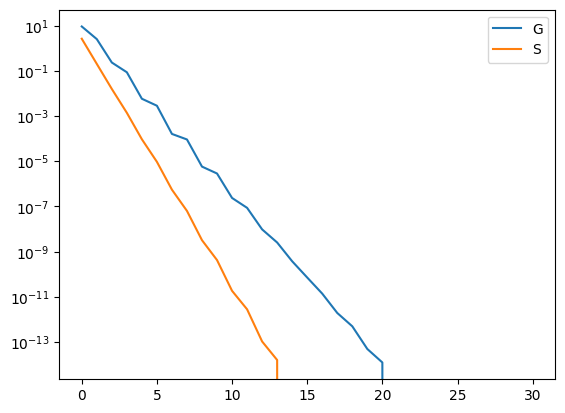

In [4]:
maxit = 30
x_gs, error_gs = gauss_seidel(A, b, x0, maxit)
x_sim, error_sim = gauss_seidel_simetrico(A, b, x0, maxit)

#print(error_gs, error_sim)

plt.semilogy(error_gs)
plt.legend("GS")

plt.semilogy(error_sim)
plt.legend("GSS")

plt.show()

## Problema 3

Sea $A \in \mathbb{R}^{n\times n}$ con espectro $\sigma(A)$ y $B = A - \mu I$. Demuestre que:
1. $\lambda \in \sigma(A) \iff \lambda - \mu \in \sigma(B)$
2. $\lambda \in \sigma(A)\backslash \{0\} \iff \frac{1}{\lambda} \in \sigma(A^{-1})\backslash \{0\}$
3. $\lambda \in \sigma(A) \iff \lambda \in \sigma(A^T)$

## Problema 4

El método de Successive over-relaxation (SOR) es una generalización de Gauss-Seidel, que cumple con la relación de recurrencia:

$$(D+\omega L)x^{(k+1)} = \omega b - (\omega U + (\omega - 1)D)x^{(k)}$$

Dada la matriz:
$$A = \begin{bmatrix} 2 & 1 & 1 & 1 \\ 4 & 3 & 3 & 1 \\ 8 & 7 & 9 & 5 \\ 6 & 8 & 6 & 5 \end{bmatrix}$$

Programe el método SOR y para $\omega \in \{0.01, 0.02, ..., 2\}$ y tolerancia $\epsilon = 10^{-8}$, calcule la cantidad de iteraciones que tarda en converger para cada $\omega$, y grafique los resultados.

In [5]:
A = np.array([[2, 1, 1, 1],
             [4, 3, 3, 1],
             [8, 7, 9, 5],
             [6, 8, 9, 5]])